## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [7]:
micro = master_micro[(master_micro['size_micro']!="unknown")].iloc[: , 3:]

In [8]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
78612,0.563,0.643,0.544,0.695,0.496,0.713,0.504,0.551,0.098,0.249,2.018,0.267,1.892,0.877,1.401,0.714,0.811,0.657,0.708,0.769,0.933,0.067,0.938,0.723,0,0.535,1.286,0.997,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.279,0.782,1.096,0.912,1.069,0.520,47.273,1.413,1.117,0.156,NaN,0.125mm,soil
78613,0.564,0.911,0.577,1.105,0.471,1.119,0.437,0.527,0.157,0.250,2.863,0.346,2.290,0.619,2.347,0.426,0.511,0.261,0.390,0.383,0.722,0.278,0.800,0.480,0,0.499,0.918,1.000,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.917,0.522,1.224,0.817,1.385,0.524,49.259,2.564,1.482,0.179,NaN,0.125mm,soil
78614,0.512,0.769,0.539,0.953,0.445,1.024,0.423,0.531,0.120,0.206,2.416,0.265,1.979,0.666,2.139,0.467,0.537,0.289,0.413,0.443,0.776,0.224,0.819,0.485,0,0.410,0.042,0.823,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.768,0.566,1.210,0.827,1.060,0.492,55.000,2.420,1.418,0.154,NaN,0.125mm,soil
78615,0.554,0.789,0.815,1.018,0.423,1.134,0.412,0.639,0.184,0.241,2.479,0.323,2.078,0.703,2.407,0.416,0.544,0.296,0.363,0.494,0.747,0.253,0.838,0.560,0,0.457,1.029,0.965,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.250,0.800,1.925,0.519,1.293,0.619,50.000,2.755,1.765,0.211,NaN,0.125mm,soil
78616,0.473,0.495,0.449,0.578,0.405,0.563,0.406,0.453,0.055,0.176,1.555,0.179,1.544,0.955,1.427,0.701,0.818,0.669,0.722,0.912,0.979,0.021,0.993,0.750,0,0.420,0.597,0.702,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.289,0.776,1.107,0.903,0.718,0.427,38.000,1.385,0.000,0.000,NaN,0.125mm,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.000,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.000,0.059,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.000,0.065,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.000,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


## data processing

### Other processing

In [9]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
78612,0.563,0.643,0.544,0.695,0.496,0.713,0.504,0.551,0.098,0.249,2.018,0.267,1.892,0.877,1.401,0.714,0.811,0.657,0.708,0.769,0.933,0.067,0.938,0.723,0,0.535,1.286,0.997,1.279,0.782,1.096,0.912,1.069,0.520,47.273,1.413,1.117,0.156,NaN,0.125mm,soil
78613,0.564,0.911,0.577,1.105,0.471,1.119,0.437,0.527,0.157,0.250,2.863,0.346,2.290,0.619,2.347,0.426,0.511,0.261,0.390,0.383,0.722,0.278,0.800,0.480,0,0.499,0.918,1.000,1.917,0.522,1.224,0.817,1.385,0.524,49.259,2.564,1.482,0.179,NaN,0.125mm,soil
78614,0.512,0.769,0.539,0.953,0.445,1.024,0.423,0.531,0.120,0.206,2.416,0.265,1.979,0.666,2.139,0.467,0.537,0.289,0.413,0.443,0.776,0.224,0.819,0.485,0,0.410,0.042,0.823,1.768,0.566,1.210,0.827,1.060,0.492,55.000,2.420,1.418,0.154,NaN,0.125mm,soil
78615,0.554,0.789,0.815,1.018,0.423,1.134,0.412,0.639,0.184,0.241,2.479,0.323,2.078,0.703,2.407,0.416,0.544,0.296,0.363,0.494,0.747,0.253,0.838,0.560,0,0.457,1.029,0.965,1.250,0.800,1.925,0.519,1.293,0.619,50.000,2.755,1.765,0.211,NaN,0.125mm,soil
78616,0.473,0.495,0.449,0.578,0.405,0.563,0.406,0.453,0.055,0.176,1.555,0.179,1.544,0.955,1.427,0.701,0.818,0.669,0.722,0.912,0.979,0.021,0.993,0.750,0,0.420,0.597,0.702,1.289,0.776,1.107,0.903,0.718,0.427,38.000,1.385,0.000,0.000,NaN,0.125mm,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.000,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.000,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.000,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.000,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [10]:
micro = micro.drop(columns=['hash', 'type_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,size_micro
78612,0.563,0.643,0.544,0.695,0.496,0.713,0.504,0.551,0.098,0.249,2.018,0.267,1.892,0.877,1.401,0.714,0.811,0.657,0.708,0.769,0.933,0.067,0.938,0.723,0.535,1.286,0.997,1.279,0.782,1.096,0.912,1.069,0.520,47.273,1.413,1.117,0.156,0.125mm
78613,0.564,0.911,0.577,1.105,0.471,1.119,0.437,0.527,0.157,0.250,2.863,0.346,2.290,0.619,2.347,0.426,0.511,0.261,0.390,0.383,0.722,0.278,0.800,0.480,0.499,0.918,1.000,1.917,0.522,1.224,0.817,1.385,0.524,49.259,2.564,1.482,0.179,0.125mm
78614,0.512,0.769,0.539,0.953,0.445,1.024,0.423,0.531,0.120,0.206,2.416,0.265,1.979,0.666,2.139,0.467,0.537,0.289,0.413,0.443,0.776,0.224,0.819,0.485,0.410,0.042,0.823,1.768,0.566,1.210,0.827,1.060,0.492,55.000,2.420,1.418,0.154,0.125mm
78615,0.554,0.789,0.815,1.018,0.423,1.134,0.412,0.639,0.184,0.241,2.479,0.323,2.078,0.703,2.407,0.416,0.544,0.296,0.363,0.494,0.747,0.253,0.838,0.560,0.457,1.029,0.965,1.250,0.800,1.925,0.519,1.293,0.619,50.000,2.755,1.765,0.211,0.125mm
78616,0.473,0.495,0.449,0.578,0.405,0.563,0.406,0.453,0.055,0.176,1.555,0.179,1.544,0.955,1.427,0.701,0.818,0.669,0.722,0.912,0.979,0.021,0.993,0.750,0.420,0.597,0.702,1.289,0.776,1.107,0.903,0.718,0.427,38.000,1.385,0.000,0.000,0.125mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0.333,0.000,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,4mm
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0.350,0.000,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,4mm
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0.442,0.000,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,4mm
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0.276,0.000,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,4mm


### Combine 1mm, 2mm, 4mm into one class

In [11]:
micro.loc[micro['size_micro'] == "4mm", 'size_micro'] = "2mm"
micro.loc[micro['size_micro'] == "2mm", 'size_micro'] = "1mm"

### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [12]:
# !pip install imblearn

In [13]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

In [14]:
micro.groupby('size_micro').describe()

Da                                                         \
               count      mean       std    min    25%    50%    75%    max   
size_micro                                                                    
0.125mm     170885.0  0.225517  0.043759  0.077  0.202  0.226  0.250  0.688   
0.25mm      115876.0  0.315536  0.076367  0.082  0.262  0.305  0.360  0.919   
0.5mm       103144.0  0.354700  0.132330  0.070  0.263  0.325  0.415  1.473   
1mm          10191.0  0.859683  0.593296  0.104  0.287  0.624  1.356  3.783   
2mm           4945.0  2.147519  1.287821  0.120  0.738  2.411  2.807  7.571   

                  Dp                                                         \
               count      mean       std    min    25%    50%    75%    max   
size_micro                                                                    
0.125mm     170885.0  0.252864  0.058242  0.130  0.219  0.248  0.281  1.021   
0.25mm      115876.0  0.347854  0.091195  0.134  0.284  0.334  0.398  1.160   
0.5mm       103144.0  0.390085  0.151690  0.132  0.286  0.355  0.457  1.760   
1mm          10191.0  0.930845  0.639726  0.131  0.316  0.696  1.459  4.326   
2mm           4945.0  2.407316  1.469805  0.137  0.832  2.640  3.142  9.314   

              FWidth                                                         \
               count      mean       std    min    25%    50%    75%    max   
size_micro                                                                    
0.125mm     170885.0  0.236235  0.064440  0.125  0.200  0.230  0.264  0.823   
0.25mm      115876.0  0.323870  0.090227  0.125  0.260  0.311  0.375  1.031   
0.5mm       103144.0  0.363162  0.143097  0.125  0.263  0.333  0.432  1.655   
1mm          10191.0  0.841913  0.582515  0.125  0.282  0.621  1.338  4.096   
2mm           4945.0  2.088539  1.271590  0.125  0.713  2.347  2.748  8.311   

             FLength                                                          \
               count      mean       std    min    25%    50%    75%     max   
size_micro                                                                     
0.125mm     170885.0  0.383125  0.141541  0.134  0.288  0.356  0.466   1.543   
0.25mm      115876.0  0.488301  0.169919  0.139  0.368  0.452  0.572   2.059   
0.5mm       103144.0  0.539402  0.237177  0.136  0.373  0.482  0.651   2.536   
1mm          10191.0  1.177975  0.829635  0.136  0.398  0.914  1.847   5.376   
2mm           4945.0  3.090683  1.949345  0.148  1.031  3.310  4.079  12.830   

           FThickness                                                         \
                count      mean       std    min    25%    50%    75%    max   
size_micro                                                                     
0.125mm      170885.0  0.156559  0.025388  0.125  0.137  0.151  0.171  0.496   
0.25mm       115876.0  0.217582  0.059748  0.125  0.173  0.208  0.251  0.642   
0.5mm        103144.0  0.244922  0.098792  0.125  0.175  0.221  0.287  1.085   
1mm           10191.0  0.603765  0.424010  0.125  0.205  0.436  0.969  2.614   
2mm            4945.0  1.390273  0.873212  0.125  0.466  1.519  1.931  5.431   

             ELength                                                          \
               count      mean       std    min    25%    50%    75%     max   
size_micro                                                                     
0.125mm     170885.0  0.393983  0.162591  0.127  0.283  0.354  0.491   1.752   
0.25mm      115876.0  0.492744  0.187154  0.134  0.363  0.447  0.576   2.460   
0.5mm       103144.0  0.540247  0.246401  0.130  0.368  0.478  0.653   2.600   
1mm          10191.0  1.164056  0.824259  0.132  0.392  0.913  1.819   5.341   
2mm           4945.0  3.057537  1.946877  0.141  1.008  3.270  4.037  13.347   

           EThickness                                                          \
                count      mean       std    min    25%    50%     75%    max   
size_micro                        

In [15]:
# define the undersampling method
# undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='auto')
undersample = RandomUnderSampler(random_state=42, replacement=True)
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['size_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [16]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [17]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [18]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,0.260,0.330,0.303,0.587,0.138,0.680,0.132,0.279,0.013,0.053,1.038,0.065,0.929,0.787,4.237,0.236,0.443,0.197,0.195,0.620,0.812,0.188,0.895,0.654,0.423,0.383,0.213,1.934,0.517,2.191,0.456,0.262,0.221,60.000,5.133,0.808,0.124,0.125mm
1,0.166,0.173,0.159,0.215,0.131,0.205,0.128,0.162,0.002,0.022,0.543,0.022,0.542,0.960,1.637,0.611,0.771,0.594,0.628,0.922,0.992,0.008,0.999,0.764,0.444,0.000,0.086,1.351,0.740,1.212,0.825,0.087,0.145,68.000,1.592,0.000,0.000,0.125mm
2,0.239,0.293,0.230,0.548,0.136,0.599,0.130,0.231,0.009,0.045,0.921,0.049,0.888,0.815,4.043,0.247,0.436,0.190,0.216,0.664,0.922,0.078,0.964,0.603,0.355,0.000,0.179,2.383,0.420,1.696,0.590,0.195,0.183,58.889,4.620,0.600,0.085,0.125mm
3,0.217,0.230,0.210,0.301,0.144,0.299,0.142,0.213,0.005,0.037,0.722,0.037,0.721,0.946,2.089,0.479,0.723,0.522,0.474,0.895,0.992,0.008,0.998,0.857,0.506,0.372,0.149,1.432,0.698,1.459,0.686,0.150,0.177,53.333,2.108,0.000,0.000,0.125mm
4,0.203,0.213,0.233,0.301,0.139,0.287,0.134,0.228,0.005,0.032,0.669,0.033,0.666,0.954,2.161,0.463,0.677,0.458,0.466,0.911,0.981,0.019,0.994,0.777,0.502,0.638,0.130,1.292,0.774,1.673,0.598,0.132,0.186,60.000,2.146,0.000,0.000,0.125mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24720,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0.333,0.000,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,2mm
24721,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0.350,0.000,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,2mm
24722,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0.442,0.000,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,2mm
24723,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0.276,0.000,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,2mm


In [19]:
data_resampled.groupby('type_micro').describe()

Da                                                         \
             count      mean       std    min    25%    50%    75%    max   
type_micro                                                                  
0.125mm     4945.0  0.224854  0.044336  0.095  0.201  0.225  0.250  0.449   
0.25mm      4945.0  0.315382  0.076952  0.111  0.260  0.305  0.362  0.652   
0.5mm       4945.0  0.358131  0.136820  0.093  0.264  0.328  0.419  1.166   
1mm         4945.0  0.851704  0.593336  0.122  0.285  0.541  1.363  3.783   
2mm         4945.0  2.147519  1.287821  0.120  0.738  2.411  2.807  7.571   

                Dp                                                         \
             count      mean       std    min    25%    50%    75%    max   
type_micro                                                                  
0.125mm     4945.0  0.252131  0.058948  0.131  0.218  0.247  0.280  0.623   
0.25mm      4945.0  0.347774  0.092626  0.136  0.281  0.334  0.399  0.994   
0.5mm       4945.0  0.394653  0.157430  0.132  0.286  0.359  0.467  1.432   
1mm         4945.0  0.922591  0.639960  0.131  0.313  0.598  1.468  4.326   
2mm         4945.0  2.407316  1.469805  0.137  0.832  2.640  3.142  9.314   

            FWidth                                                         \
             count      mean       std    min    25%    50%    75%    max   
type_micro                                                                  
0.125mm     4945.0  0.235345  0.064655  0.125  0.199  0.229  0.264  0.666   
0.25mm      4945.0  0.323960  0.091330  0.125  0.258  0.312  0.376  0.926   
0.5mm       4945.0  0.367640  0.148930  0.125  0.262  0.336  0.439  1.247   
1mm         4945.0  0.834209  0.581013  0.125  0.279  0.532  1.335  4.096   
2mm         4945.0  2.088539  1.271590  0.125  0.713  2.347  2.748  8.311   

           FLength                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
0.125mm     4945.0  0.380053  0.142416  0.137  0.285  0.352  0.462   1.320   
0.25mm      4945.0  0.488993  0.172753  0.141  0.366  0.449  0.572   1.592   
0.5mm       4945.0  0.547050  0.246138  0.138  0.373  0.489  0.663   2.089   
1mm         4945.0  1.169247  0.832580  0.136  0.397  0.797  1.845   5.188   
2mm         4945.0  3.090683  1.949345  0.148  1.031  3.310  4.079  12.830   

           FThickness                                                         \
                count      mean       std    min    25%    50%    75%    max   
type_micro                                                                     
0.125mm        4945.0  0.156271  0.025425  0.125  0.136  0.150  0.171  0.300   
0.25mm         4945.0  0.217367  0.060832  0.125  0.172  0.207  0.252  0.497   
0.5mm          4945.0  0.246682  0.101607  0.125  0.176  0.221  0.288  1.048   
1mm            4945.0  0.598483  0.423895  0.125  0.204  0.395  0.963  2.614   
2mm            4945.0  1.390273  0.873212  0.125  0.466  1.519  1.931  5.431   

           ELength                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
0.125mm     4945.0  0.390783  0.163279  0.129  0.280  0.350  0.486   1.404   
0.25mm      4945.0  0.493824  0.191600  0.134  0.362  0.445  0.578   1.872   
0.5mm       4945.0  0.548267  0.256302  0.133  0.368  0.484  0.669   2.420   
1mm         4945.0  1.155847  0.828758  0.132  0.391  0.783  1.816   5.037   
2mm         4945.0  3.057537  1.946877  0.141  1.008  3.270  4.037  13.347   

           EThickness                                                         \
                count      mean       std    min    25%    50%    75%    max   
type_micro                                                                     
0.125mm        4945.0  0.153102  0

In [20]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [21]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [22]:
# from sklearn.model_selection import train_test_split
# import numpy as np

# # X is your feature data
# # y is your target data
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# # Now you can perform the train-test split on X_train and y_train
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

## Models

### Lazy predict

In [23]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)

In [25]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train_transformed, y_test_transformed)
models

100%|███████████████████████████████████████████| 29/29 [03:38<00:00,  7.54s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.63,0.63,None,0.64,7.33
ExtraTreesClassifier,0.63,0.63,None,0.63,2.80
XGBClassifier,0.63,0.63,None,0.63,8.31
LGBMClassifier,0.62,0.62,None,0.63,1.22
BaggingClassifier,0.62,0.62,None,0.62,4.22
SVC,0.60,0.60,None,0.61,32.59
LinearSVC,0.58,0.58,None,0.58,12.70
NuSVC,0.58,0.58,None,0.58,56.69
LogisticRegression,0.57,0.57,None,0.58,0.70


### LightBGM

#### train-test split

In [26]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [27]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [28]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['0.125mm', '0.25mm', '0.5mm', '1mm', '2mm'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.8403
Accuracy of LGBM classifier on test set: 0.6239
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       989
           1       0.41      0.51      0.46       989
           2       0.44      0.38      0.41       989
           3       0.76      0.61      0.68       989
           4       0.93      0.77      0.84       989

    accuracy                           0.62      4945
   macro avg       0.64      0.62      0.63      4945
weighted avg       0.64      0.62      0.63      4945



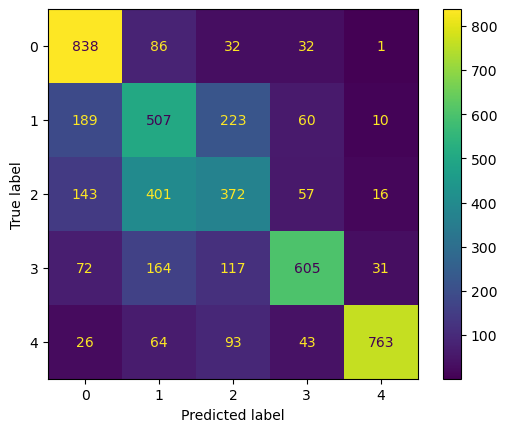

In [30]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


In [31]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [34]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [35]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 63}


In [36]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,19.50,0.10,0.98,0.05,0.01,1000,63,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.64,0.64,0.65,0.64,0.64,0.64,0.00,1
14,18.89,0.45,0.60,0.02,0.01,500,127,"{'learning_rate': 0.01, 'n_estimators': 500, '...",0.64,0.64,0.64,0.64,0.64,0.64,0.00,2
17,36.86,3.11,1.65,0.07,0.01,1000,127,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.64,0.64,0.64,0.64,0.64,0.64,0.00,3


In [37]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of LBGM classifier on training set: 0.9575
Accuracy of LBGM classifier on test set: 0.6332
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       989
           1       0.43      0.51      0.47       989
           2       0.45      0.39      0.42       989
           3       0.77      0.65      0.71       989
           4       0.93      0.77      0.84       989

    accuracy                           0.63      4945
   macro avg       0.65      0.63      0.64      4945
weighted avg       0.65      0.63      0.64      4945



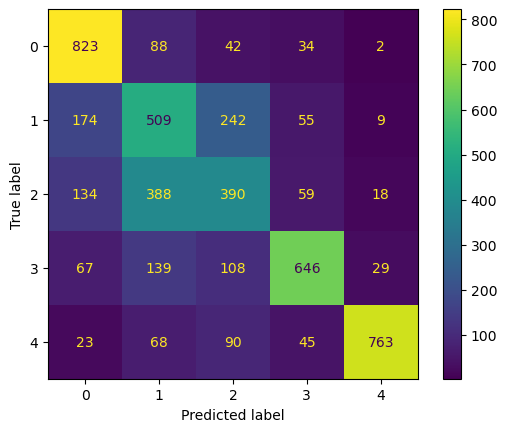

In [38]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [39]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [40]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

    feature_name  importance
24     Curvature        1312
33   Ellipticity         876
23  Transparency         861
25  Surface Area         804
16     Roundness         629
13     L/T Ratio         595
22        Extent         572
4        ELength         539
7         Volume         519
20     Concavity         517


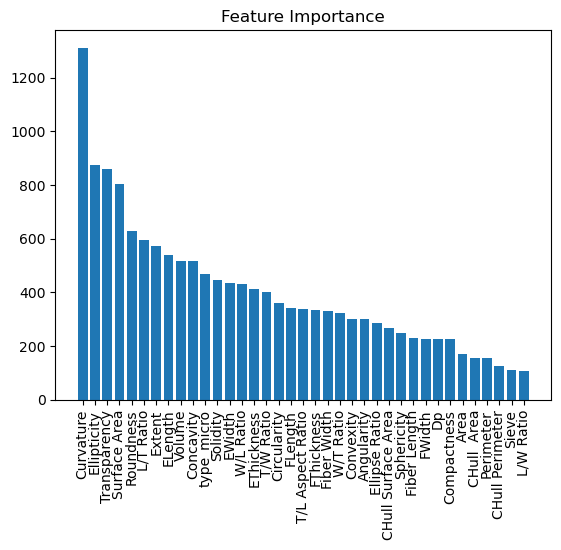

In [41]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [42]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [43]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [44]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['0.125mm', '0.25mm', '0.5mm', '1mm', '2mm'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.5357
Accuracy of LGBM classifier on test set: 0.5335
              precision    recall  f1-score   support

           0       0.59      0.87      0.70       989
           1       0.39      0.57      0.46       989
           2       0.47      0.24      0.32       989
           3       0.63      0.22      0.32       989
           4       0.64      0.77      0.70       989

    accuracy                           0.53      4945
   macro avg       0.54      0.53      0.50      4945
weighted avg       0.54      0.53      0.50      4945



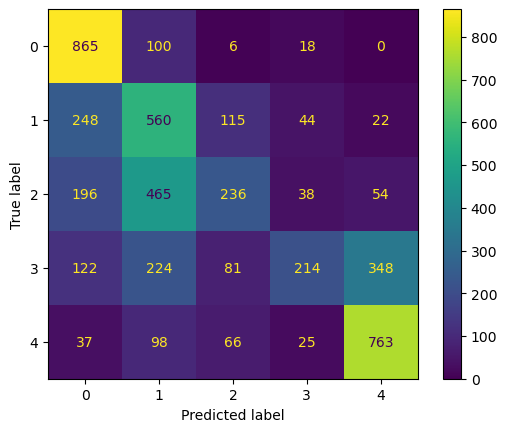

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

In [47]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [50]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [51]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 150}


In [52]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,5.80,0.10,0.07,0.00,SAMME,0.5,150,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.59,0.58,0.59,0.59,0.58,0.59,0.00,1
4,3.88,0.06,0.05,0.01,SAMME,0.5,100,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.59,0.58,0.59,0.59,0.58,0.59,0.00,2
8,5.72,0.12,0.07,0.01,SAMME,1.0,150,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.57,0.58,0.58,0.57,0.57,0.57,0.00,3


In [53]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 0.5893
Accuracy of AdaBoost classifier on test set: 0.5875
              precision    recall  f1-score   support

           0       0.58      0.83      0.68       989
           1       0.37      0.44      0.40       989
           2       0.43      0.45      0.44       989
           3       0.91      0.46      0.61       989
           4       0.94      0.75      0.83       989

    accuracy                           0.59      4945
   macro avg       0.65      0.59      0.59      4945
weighted avg       0.65      0.59      0.59      4945



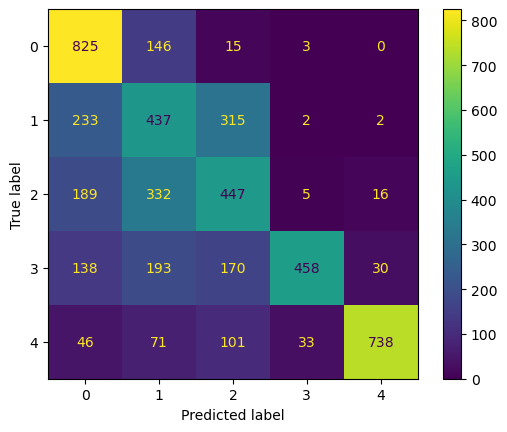

In [54]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [55]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [56]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

     feature_name  importance
19       Solidity        0.12
26      L/W Ratio        0.12
24      Curvature        0.08
6          EWidth        0.06
12     Sphericity        0.06
17  Ellipse Ratio        0.04
16      Roundness        0.04
23   Transparency        0.04
10    CHull  Area        0.04
27      W/L Ratio        0.04


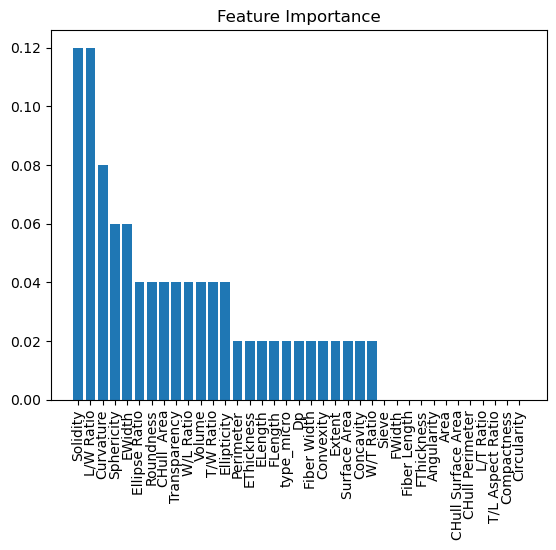

In [57]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [58]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [59]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [60]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['0.125mm', '0.25mm', '0.5mm', '1mm', '2mm'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 1.0000
Accuracy of RF classifier on test set: 0.6336
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       989
           1       0.42      0.49      0.45       989
           2       0.44      0.40      0.42       989
           3       0.81      0.68      0.74       989
           4       0.94      0.76      0.84       989

    accuracy                           0.63      4945
   macro avg       0.65      0.63      0.64      4945
weighted avg       0.65      0.63      0.64      4945



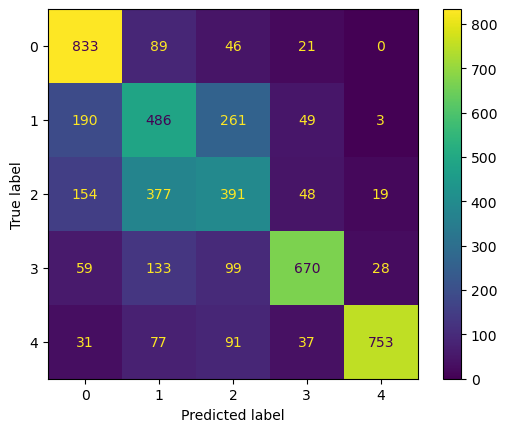

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [63]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [66]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [67]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [68]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.94,0.01,0.02,0.00,10,5,100,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.60,0.60,0.60,0.61,0.60,0.60,0.01,1
20,0.99,0.03,0.02,0.00,10,2,100,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.61,0.59,0.60,0.61,0.60,0.60,0.01,2
19,0.50,0.02,0.01,0.00,10,2,50,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.61,0.60,0.59,0.60,0.60,0.60,0.00,3


#### Re-run model

Accuracy of Random Forest classifier on training set: 0.6075
Accuracy of Random Forest classifier on test set: 0.7308
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       989
           1       0.54      0.74      0.63       989
           2       0.68      0.56      0.61       989
           3       0.96      0.62      0.76       989
           4       0.99      0.79      0.88       989

    accuracy                           0.73      4945
   macro avg       0.77      0.73      0.73      4945
weighted avg       0.77      0.73      0.73      4945



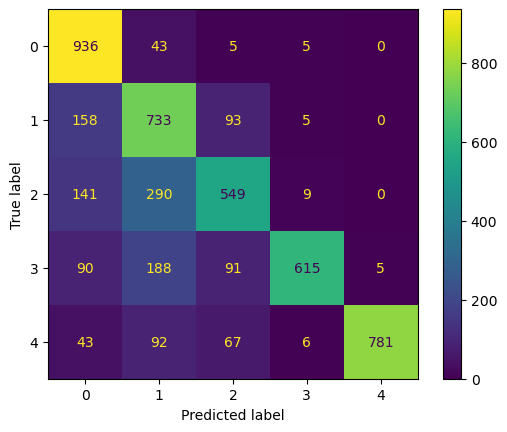

In [69]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [70]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [71]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

       feature_name  importance
31            Sieve        0.06
0                Dp        0.05
26        L/W Ratio        0.05
12       Sphericity        0.05
1            FWidth        0.05
10      CHull  Area        0.05
9         Perimeter        0.04
24        Curvature        0.04
11  CHull Perimeter        0.03
32       Angularity        0.03


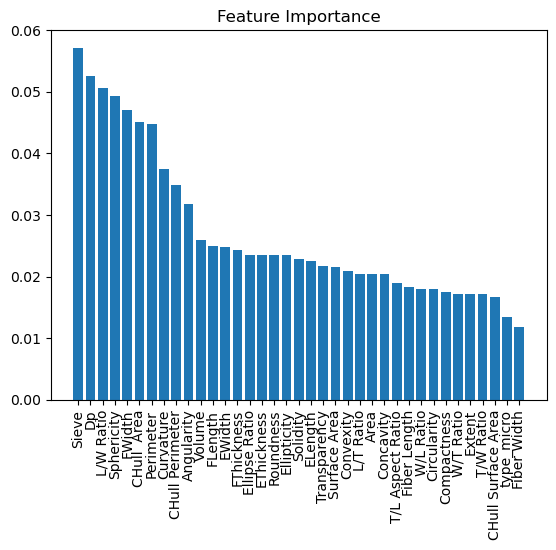

In [72]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [73]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [74]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [75]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['0.125mm', '0.25mm', '0.5mm', '1mm', '2mm'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.5856
Accuracy of LGBM classifier on test set: 0.5786
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       989
           1       0.37      0.65      0.47       989
           2       0.53      0.17      0.26       989
           3       0.93      0.46      0.62       989
           4       0.95      0.75      0.83       989

    accuracy                           0.58      4945
   macro avg       0.66      0.58      0.57      4945
weighted avg       0.66      0.58      0.57      4945



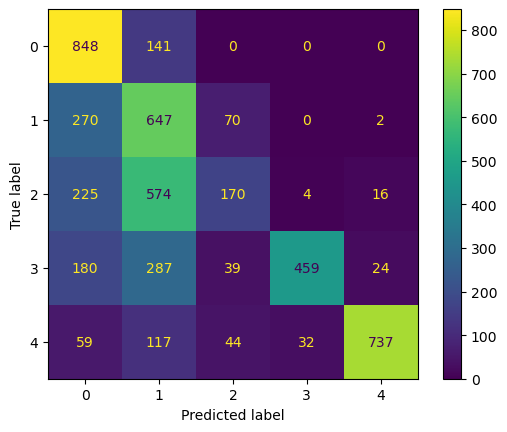

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

In [78]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [81]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [82]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 150}


In [83]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,8.83,0.08,0.11,0.01,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.59,0.58,0.58,0.58,0.59,0.59,0.00,1
10,5.72,0.08,0.08,0.01,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.59,0.58,0.58,0.59,0.59,0.59,0.00,2
9,2.90,0.07,0.04,0.01,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.59,0.58,0.58,0.59,0.59,0.58,0.00,3


In [84]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.5884
Accuracy of Bagging classifie on test set: 0.5836
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       989
           1       0.37      0.64      0.47       989
           2       0.52      0.22      0.31       989
           3       0.93      0.46      0.62       989
           4       0.95      0.75      0.84       989

    accuracy                           0.58      4945
   macro avg       0.66      0.58      0.58      4945
weighted avg       0.66      0.58      0.58      4945



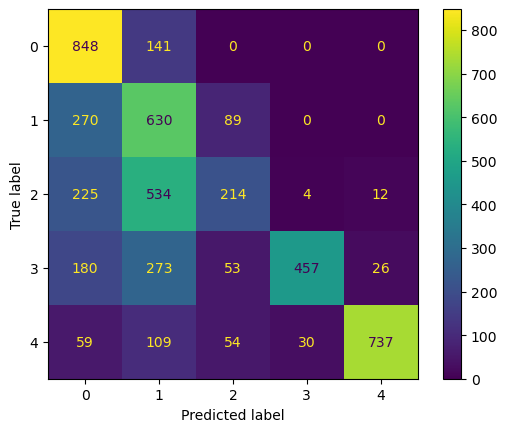

In [85]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [86]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [87]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [88]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [89]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [90]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [91]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['0.125mm', '0.25mm', '0.5mm', '1mm', '2mm'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.6182
Accuracy of LR classifier on test set: 0.6042
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       989
           1       0.38      0.59      0.47       989
           2       0.44      0.35      0.39       989
           3       0.93      0.46      0.62       989
           4       0.95      0.75      0.84       989

    accuracy                           0.60      4945
   macro avg       0.67      0.60      0.61      4945
weighted avg       0.67      0.60      0.61      4945



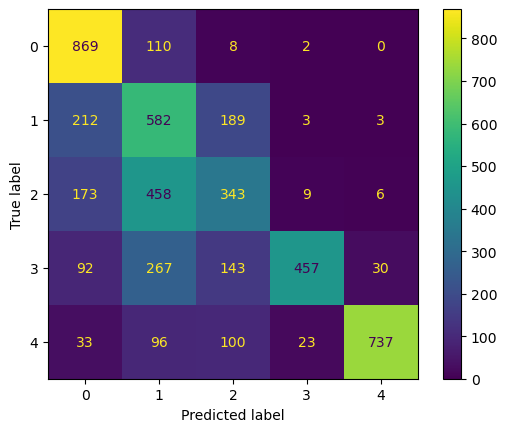

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

In [94]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [97]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [98]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [99]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.72,0.04,0.53,0.02,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.59,0.57,0.61,0.59,0.60,0.60,0.01,1
13,0.86,0.03,0.59,0.02,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.57,0.57,0.61,0.58,0.59,0.58,0.02,2
22,0.88,0.00,0.55,0.01,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.58,0.57,0.60,0.56,0.59,0.58,0.01,3


In [100]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.6021
Accuracy of SV classifie on test set: 0.6224
              precision    recall  f1-score   support

           0       0.63      0.88      0.74       989
           1       0.41      0.62      0.49       989
           2       0.50      0.37      0.43       989
           3       0.88      0.50      0.64       989
           4       0.97      0.73      0.83       989

    accuracy                           0.62      4945
   macro avg       0.68      0.62      0.63      4945
weighted avg       0.68      0.62      0.63      4945



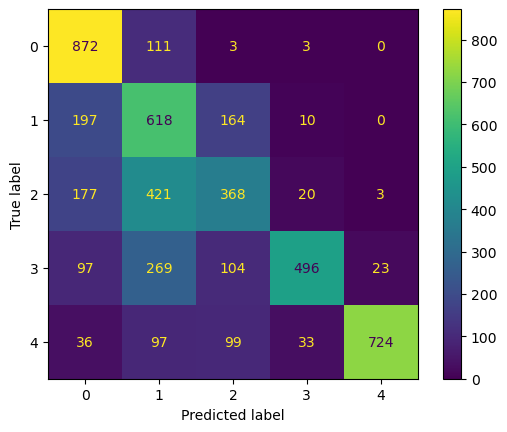

In [101]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [102]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [103]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [104]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [105]:
### XGBoost

In [106]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [107]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test2_svc]}

accuracy = pd.DataFrame(df)


In [108]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV
0,LightGBM,0.84,0.62,0.96,0.63
1,AdaBoost,0.54,0.53,0.59,0.59
2,Random Forest,1.00,0.63,0.61,0.73
3,Bagging,0.59,0.58,0.59,0.58
4,SVC,0.62,0.60,0.60,0.62


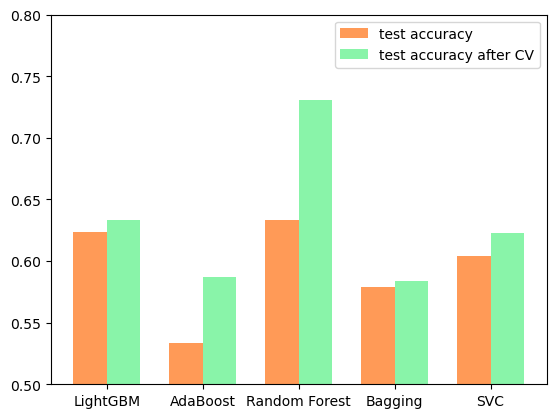

In [130]:
bar_width = 0.35

models = np.arange(len(df['model']))

plt.bar(models - bar_width/2, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

# for i, v in enumerate(df['test_accuracy']):
#     plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

# for i, v in enumerate(df['test_accuracy_CV']):
#     plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

plt.xticks(models, df['model'])
plt.ylim(0.5,0.8)
plt.legend()
plt.show()

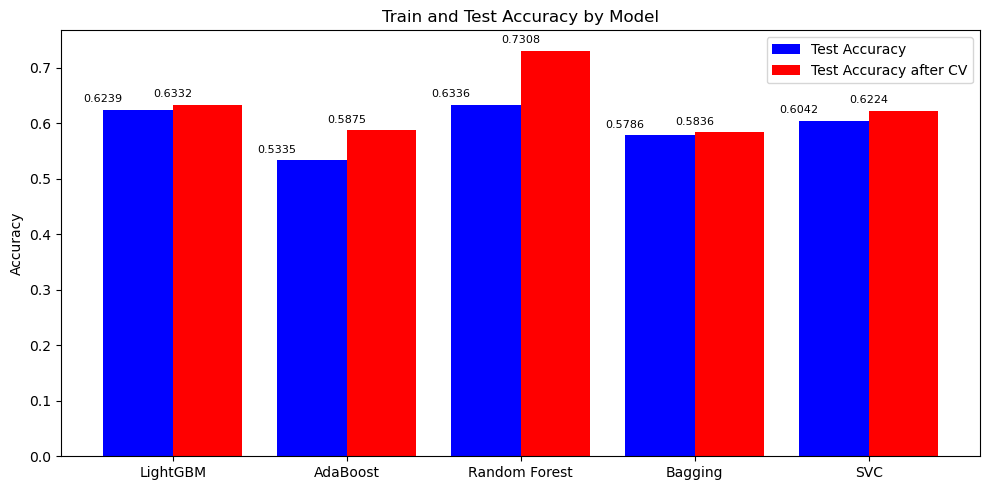

In [110]:
bar_width = 0.4
index = df.index

fig, ax = plt.subplots(figsize=(10, 5))

train_acc = ax.bar(index, df['test_accuracy'], bar_width, color='b')
test_acc = ax.bar(index + bar_width, df['test_accuracy_CV'], bar_width, color='r')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['model'])
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy by Model')

plt.legend((train_acc[0], test_acc[0]), ('Test Accuracy', 'Test Accuracy after CV'))

for i, v in enumerate(df['test_accuracy']):
    plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), fontsize=8, ha='center', va='bottom')

for i, v in enumerate(df['test_accuracy_CV']):
    plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), fontsize=8, ha='center', va='bottom')

plt.tight_layout()
plt.show()





In [111]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [112]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [113]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [114]:
fi_LGBM.head(5)

,feature_name,importance,rank
24,Curvature,0.09,1
33,Ellipticity,0.06,2
23,Transparency,0.06,3
25,Surface Area,0.05,4
16,Roundness,0.04,5


In [115]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [116]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [117]:
fi_ada.head(5)

,feature_name,importance,rank
19,Solidity,0.12,1
26,L/W Ratio,0.12,2
24,Curvature,0.08,3
6,EWidth,0.06,4
12,Sphericity,0.06,5


In [118]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [119]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [120]:
fi_rf.head()

,feature_name,importance,rank
31,Sieve,0.06,1
0,Dp,0.05,2
26,L/W Ratio,0.05,3
12,Sphericity,0.05,4
1,FWidth,0.05,5


In [121]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [122]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf])

In [123]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [124]:
mean_rank.head(10)

,importance
feature_name,
Curvature,0.07
L/W Ratio,0.06
Solidity,0.06
Sphericity,0.04
Ellipticity,0.04
Transparency,0.04
EWidth,0.04
Roundness,0.04
Volume,0.03


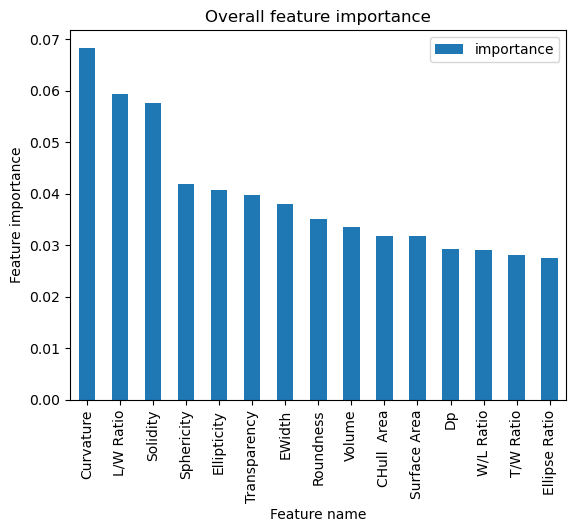

In [125]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()